In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# import matplotlib.patches as patches
# from matplotlib.colors import to_rgba

In [2]:
df = pd.read_csv('data/GITaylor_Trinity_data.csv')

In [3]:
df['t_sec'] = df['t_msec'] * 1e-3
df['R_cm'] = df['R_m'] * 1e2

df['log10_t'] = df['t_sec'].apply(lambda x: np.log10(x))
df['log10_R'] = df['R_cm'].apply(lambda x: np.log10(x))
df['5/2*log10_R'] = df['log10_R'] * 5/2

In [4]:
len(df)

25

In [5]:
df.head()

,t_msec,R_m,t_sec,R_cm,log10_t,log10_R,5/2*log10_R
0,0.10,11.1,0.00010,1110.0,-4.000000,3.045323,7.613307
1,0.24,19.9,0.00024,1990.0,-3.619789,3.298853,8.247133
2,0.38,25.4,0.00038,2540.0,-3.420216,3.404834,8.512084
3,0.52,28.8,0.00052,2880.0,-3.283997,3.459392,8.648481
4,0.66,31.9,0.00066,3190.0,-3.180456,3.503791,8.759477


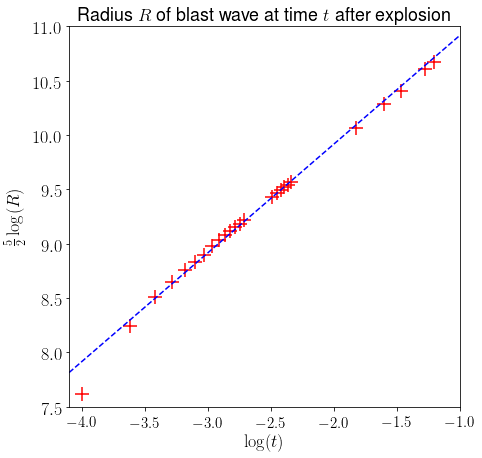

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.1, -1
ymin, ymax = 7.5, 11
ax.set_title(r'Radius $R$ of blast wave at time $t$ after explosion', fontsize=18)
ax.scatter(df['log10_t'], df['5/2*log10_R'], s=180, marker='+', color='r')
logt = np.linspace(xmin, xmax, 2)
ax.plot(logt, logt + 11.915, 'b--')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t)$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R)$', fontsize=18)
# ax.set_xticklabels(x_ticks, rotation=0, fontsize=15)
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=15)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18);
# fig.savefig('plots/BlastWaveRadius.pdf', bbox_inches='tight')

In [21]:
X = df['log10_t'].values.reshape(1, -1).T
y = df['5/2*log10_R'].values
y.shape, X.shape

((25,), (25, 1))

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
yhat = model.predict(X)

R^2 = 0.99


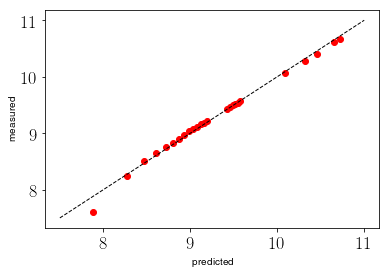

In [26]:
from sklearn.metrics import r2_score
print(f'R^2 = {r2_score(yhat, y):.2f}')
plt.scatter(yhat, y, color='r')
line = np.linspace(7.5, 11)
plt.xlabel('predicted')
plt.ylabel('measured')
plt.plot(line, line, 'k--', linewidth=1);

In [29]:
model.intercept_, model.coef_[0]

(11.94184053505476, 1.0145565627511377)

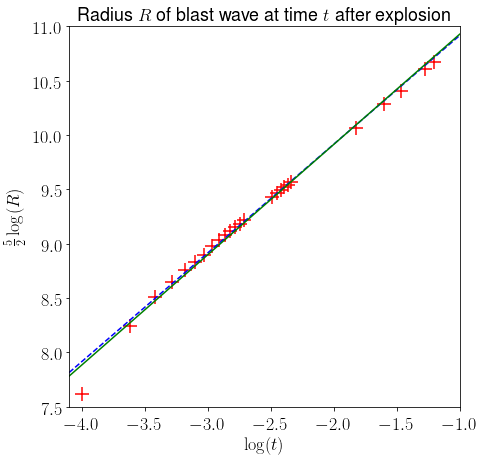

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.1, -1
ymin, ymax = 7.5, 11
ax.set_title(r'Radius $R$ of blast wave at time $t$ after explosion', fontsize=18)
ax.scatter(df['log10_t'], df['5/2*log10_R'], s=180, marker='+', color='r')
logt = np.linspace(xmin, xmax, 2)
ax.plot(logt, logt + 11.915, 'b--')
ax.plot(logt, model.intercept_ + model.coef_[0] * logt, 'g-')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t)$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R)$', fontsize=18)
# ax.set_xticklabels(x_ticks, rotation=0, fontsize=15)
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=15)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18);
# fig.savefig('plots/BlastWaveRadius.pdf', bbox_inches='tight')